# 4차 프로그래밍 과제

(1) II. 데이터 셋에서 주어진 특징들을 선택하여 CPU 성능 즉, “PRP” 변수를 예측하는 Pipeline 기반 다중 회귀 모델링을 프로그래밍 하시오.

Missing values:
 VendorName    0
ModelName     0
MYCT          0
MMIN          0
MMAX          0
CACH          0
CHMIN         0
CHMAX         0
PRP           0
ERP           0
dtype: int64
학습 데이터 MSE: 11.249644140084856
테스트 데이터 MSE: 3074.280973617652
학습 데이터 R^2: 0.999414826247116
테스트 데이터 R^2: 0.9396096835317377
교차 검증 점수: [0.60967548 0.57815753 0.89930363 0.91535842 0.86827505]
평균 교차 검증 점수: 0.7741540213826397


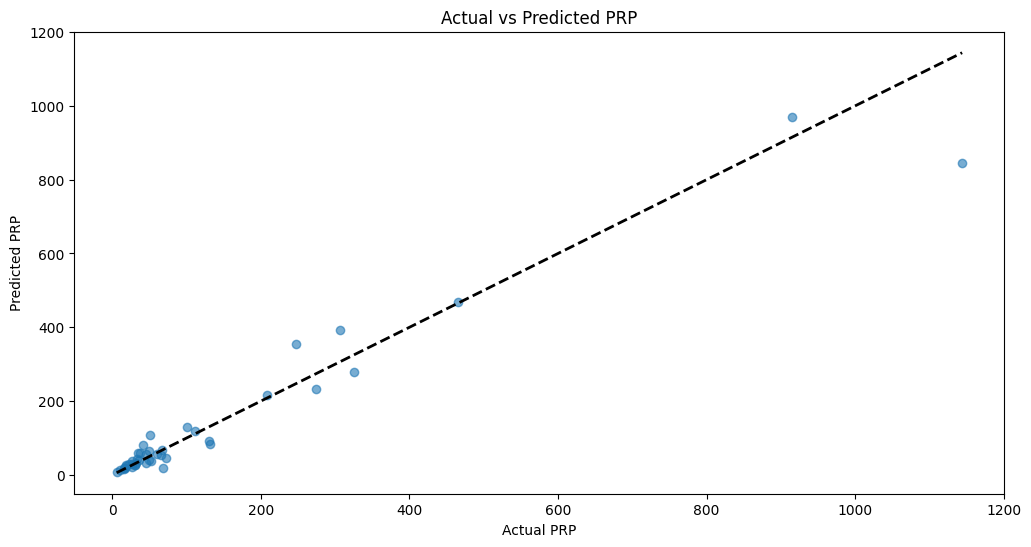

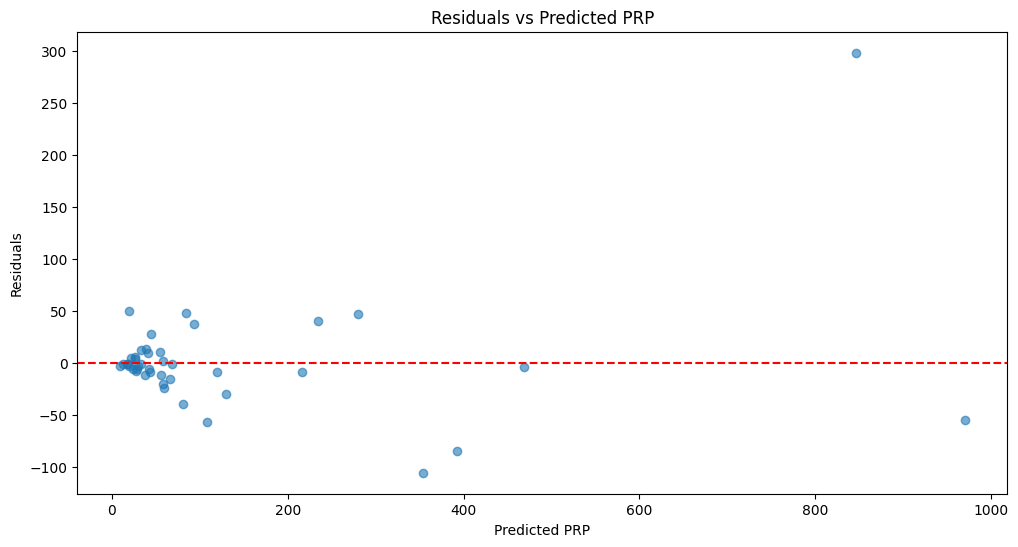

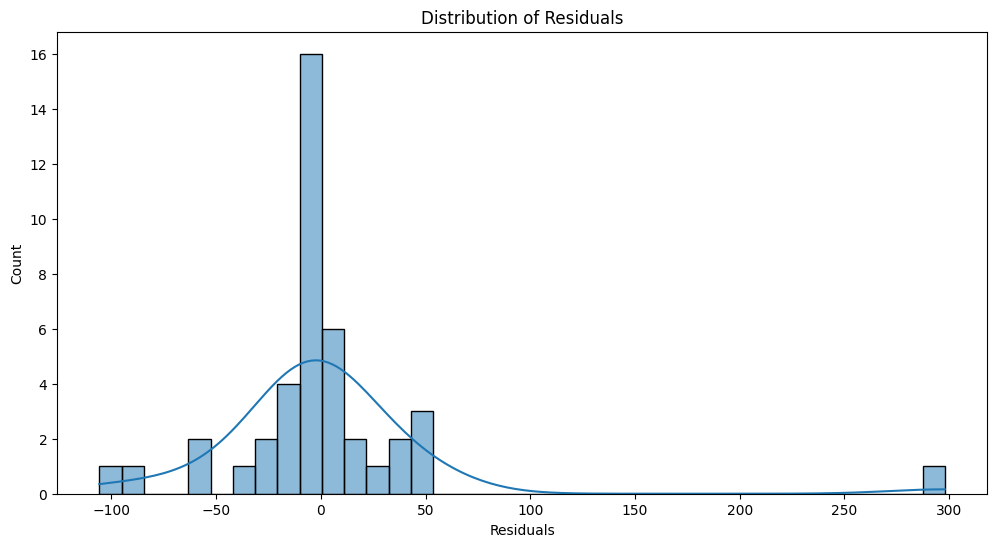

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# machine.data_update.csv 데이터 셋 불러오기
data = pd.read_csv('machine.data_update.csv')

# 결측값 확인 및 처리리
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# 범주형 데이터를 숫자형 데이터로 수치화
data = pd.get_dummies(data, columns=['VendorName', 'ModelName'], drop_first=True)

# 특징과 타겟 변수 분리
features = data.drop('PRP', axis=1)
target = data['PRP']

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 파이프라인 설정
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ensemble', GradientBoostingRegressor(random_state=42))
])

# 하이퍼파라미터 그리드 설정
param_grid = {
    'ensemble__n_estimators': [100, 150],
    'ensemble__learning_rate': [0.05, 0.1],
    'ensemble__max_depth': [3, 4]
}

# GridSearchCV를 사용하여 하이퍼파라미터 튜닝
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적 모델
best_model = grid_search.best_estimator_

# 최적 모델로 예측 수행
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# 모델 평가
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('학습 데이터 MSE:', train_mse)
print('테스트 데이터 MSE:', test_mse)
print('학습 데이터 R^2:', train_r2)
print('테스트 데이터 R^2:', test_r2)

# 교차 검증 점수
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, n_jobs=-1)
print('교차 검증 점수:', cv_scores)
print('평균 교차 검증 점수:', np.mean(cv_scores))

# 시각화: 실제값 vs 예측값
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.xlabel('Actual PRP')
plt.ylabel('Predicted PRP')
plt.title('Actual vs Predicted PRP')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

# 잔차 (Residual) 시각화
residuals = y_test - y_test_pred
plt.figure(figsize=(12, 6))
plt.scatter(y_test_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted PRP')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted PRP')
plt.show()

# 잔차의 분포
plt.figure(figsize=(12, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

(2) (1) 단계에서 얻은 Pipeline 기반 모델 GridSearchCV의 best_estimator모델을 사용하여 학습 데이터와 테스트 데이터 각각에 대해 이 모델의 성능을 평가하시오.

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 최적 모델
best_model = grid_search.best_estimator_

# 최적 모델로 예측 수행
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# 학습 데이터 성능 평가
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print('학습 데이터 MSE:', train_mse)
print('학습 데이터 MAE:', train_mae)
print('학습 데이터 R^2:', train_r2)

# 테스트 데이터 성능 평가
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print('테스트 데이터 MSE:', test_mse)
print('테스트 데이터 MAE:', test_mae)
print('테스트 데이터 R^2:', test_r2)

# 교차 검증 점수
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, n_jobs=-1)
print('교차 검증 점수:', cv_scores)
print('평균 교차 검증 점수:', np.mean(cv_scores))

학습 데이터 MSE: 11.249644140084856
학습 데이터 MAE: 3.0008146330746555
학습 데이터 R^2: 0.999414826247116
테스트 데이터 MSE: 3074.280973617652
테스트 데이터 MAE: 27.04029688177628
테스트 데이터 R^2: 0.9396096835317377
교차 검증 점수: [0.60967548 0.57815753 0.89930363 0.91535842 0.86827505]
평균 교차 검증 점수: 0.7741540213826397


(3) (2) 단계에서 얻은 Pipeline 기반 GridSearchCV의 best_estimator모델의 테스트 데이터에 대해 예측 성능 R^2가 85% 이상이 나오도록 모델을 개선하시오.

In [16]:
# 하이퍼파라미터 그리드 설정
param_grid = {
    'ensemble__n_estimators': [100, 150],
    'ensemble__learning_rate': [0.05, 0.1],
    'ensemble__max_depth': [3, 4]
}

# 최적 모델
best_model = grid_search.best_estimator_

# 최적 모델로 예측 수행
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# 테스트 데이터 성능 평가
test_r2 = r2_score(y_test, y_test_pred)
print('테스트 데이터 R^2:', test_r2)

테스트 데이터 R^2: 0.9376627896769371


(4) I. 3차 프로그래밍 과제의 기본모델의 (2) 단계와 II. 4차 프로그래밍 과제의 제안 모델의 (2) 단계에서 얻은 학습 데이터와 테스트 데이터에 대한 성능 지표(MSE, MAE, R^2, 교차 검증)를 데이터프레임에 저장하여 이 성능 결과를 바 차트로 시각화하여 학습 데이터와 테스트 데이터에 대한 각 모델의 성능 차이를 비교 분석하시오.

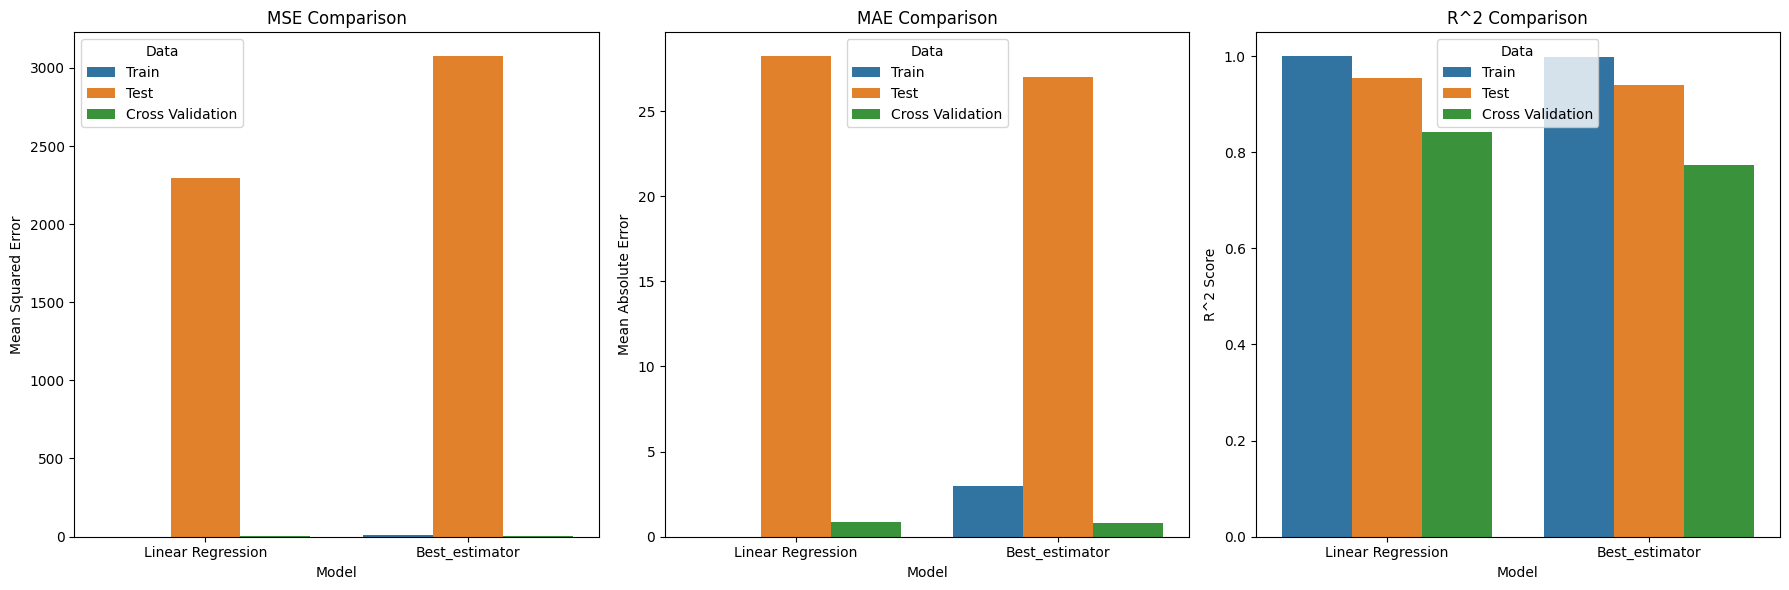

               Model              Data           MSE           MAE       R^2
0  Linear Regression             Train  1.126518e-19  2.261360e-10  1.000000
1  Linear Regression              Test  2.295449e+03  2.823493e+01  0.954909
2     Best_estimator             Train  1.124964e+01  3.000815e+00  0.999415
3     Best_estimator              Test  3.074281e+03  2.704030e+01  0.939610
4  Linear Regression  Cross Validation  8.419307e-01  8.419307e-01  0.841931
5     Best_estimator  Cross Validation  7.741540e-01  7.741540e-01  0.774154


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# machine.data_update.csv 데이터 셋 불러오기
data = pd.read_csv('machine.data_update.csv')

# 범주형 데이터를 숫자형 데이터로 수치화
data = pd.get_dummies(data, columns=['VendorName', 'ModelName'], drop_first=True)

# 특징과 타겟 변수 분리
features = data.drop('PRP', axis=1)
target = data['PRP']

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Linear Regression 모델
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Linear Regression 예측 및 평가
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

train_mse_lr = mean_squared_error(y_train, y_train_pred_lr)
train_mae_lr = mean_absolute_error(y_train, y_train_pred_lr)
train_r2_lr = r2_score(y_train, y_train_pred_lr)

test_mse_lr = mean_squared_error(y_test, y_test_pred_lr)
test_mae_lr = mean_absolute_error(y_test, y_test_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)

cv_scores_lr = cross_val_score(lr_model, X_train, y_train, cv=5)

# Pipeline 기반 Gradient Boosting 모델
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('ensemble', GradientBoostingRegressor(random_state=42))
])

# 하이퍼파라미터 그리드 설정
param_grid = {
    'ensemble__n_estimators': [100, 150],
    'ensemble__learning_rate': [0.05, 0.1],
    'ensemble__max_depth': [3, 4]
}

# GridSearchCV를 사용하여 하이퍼파라미터 튜닝
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적 모델
best_model = grid_search.best_estimator_

# 최적 모델로 예측 수행
y_train_pred_best = best_model.predict(X_train)
y_test_pred_best = best_model.predict(X_test)

# 최적 모델 성능 평가
train_mse_best = mean_squared_error(y_train, y_train_pred_best)
train_mae_best = mean_absolute_error(y_train, y_train_pred_best)
train_r2_best = r2_score(y_train, y_train_pred_best)

test_mse_best = mean_squared_error(y_test, y_test_pred_best)
test_mae_best = mean_absolute_error(y_test, y_test_pred_best)
test_r2_best = r2_score(y_test, y_test_pred_best)

cv_scores_best = cross_val_score(best_model, X_train, y_train, cv=5)

# 성능 지표를 데이터프레임에 저장
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Linear Regression', 'Best_estimator', 'Best_estimator', 'Linear Regression', 'Best_estimator'],
    'Data': ['Train', 'Test', 'Train', 'Test', 'Cross Validation', 'Cross Validation'],
    'MSE': [train_mse_lr, test_mse_lr, train_mse_best, test_mse_best, cv_scores_lr.mean(), cv_scores_best.mean()],
    'MAE': [train_mae_lr, test_mae_lr, train_mae_best, test_mae_best, cv_scores_lr.mean(), cv_scores_best.mean()],
    'R^2': [train_r2_lr, test_r2_lr, train_r2_best, test_r2_best, cv_scores_lr.mean(), cv_scores_best.mean()]
})

# 성능 지표 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x='Model', y='MSE', hue='Data', data=results, ax=axes[0])
axes[0].set_title('MSE Comparison')
axes[0].set_ylabel('Mean Squared Error')

sns.barplot(x='Model', y='MAE', hue='Data', data=results, ax=axes[1])
axes[1].set_title('MAE Comparison')
axes[1].set_ylabel('Mean Absolute Error')

sns.barplot(x='Model', y='R^2', hue='Data', data=results, ax=axes[2])
axes[2].set_title('R^2 Comparison')
axes[2].set_ylabel('R^2 Score')

plt.tight_layout()
plt.show()

# 결과 출력
print(results)